In [1]:
import json
import os
import pandas as pd

def load_json(filename):
    with open(filename) as f:
        dict_list = [json.loads(line) for line in f]
    return dict_list




In [2]:
import pandas as pd
# from load_json import load_json
import matplotlib.pyplot as plt

result_list = load_json('general_cap_thesis')
df_result = pd.DataFrame(result_list, columns=list(result_list[0].keys()))
df_result.head()
agg_dict = {key: 'mean' for key in result_list[0].keys()}
del agg_dict['ex_identifier']
del agg_dict['task_num']
del agg_dict['agent_num']
del agg_dict['DSA_converge']
del agg_dict['BnBFMS_converge']


result_agg = df_result.groupby(['task_num'], as_index=False).agg(agg_dict)
show_grouped_result = pd.DataFrame(result_agg)
show_grouped_result

,task_num,BnBFMS_u,BnBFMS_t,BnBFMS_iter,rand,dsa_u,dsa_t,dsa_iter,dsa_msg,LS_u,LS_t,LS_iter,LS_msg_num,LS_converge,disNE_u,disNE_t,disNE_iter,DisNE_msg,DisNE_converge
0,100,3479.24,3.509297,300.0,1631.61,3512.70,0.037590,11.09,1319.24,3499.55,0.029990,6.90,1999.08,True,3509.05,0.033541,6.70,2192.85,True
1,200,7393.18,300.506987,356.8,3765.20,7464.33,0.270967,24.67,10287.92,7384.14,0.125887,10.30,8118.52,True,7434.86,0.129728,9.03,7669.21,True
2,300,11215.04,315.436275,7.7,6204.24,11780.05,1.670060,67.85,66638.16,11532.67,0.295341,12.41,18159.13,True,11657.82,0.289136,10.17,16109.98,True
3,400,12108.14,709.962939,1.0,9026.60,14211.48,300.086133,3889.17,12757651.68,15949.25,0.533497,14.12,31396.59,True,16165.66,0.518242,10.91,27496.96,True
4,500,NaN,NaN,NaN,12063.35,17020.13,300.148420,2188.93,12624911.26,20631.69,0.848849,15.50,48157.00,True,20941.02,0.799074,11.27,41769.83,True
5,600,NaN,NaN,NaN,15218.38,19849.11,300.235947,1447.57,12261562.09,25297.54,1.250665,16.54,68683.70,True,25697.75,1.188592,12.07,59200.36,True
6,700,NaN,NaN,NaN,18420.96,22765.20,300.308089,1035.26,11854783.62,30054.43,1.720901,17.47,91915.85,True,30571.79,1.648309,12.72,79393.22,True
7,800,NaN,NaN,NaN,21665.28,25639.83,300.423599,786.71,11531023.98,34732.71,2.294741,18.56,119098.91,True,35345.70,2.174746,12.68,102473.76,True
8,900,NaN,NaN,NaN,24885.23,28499.91,300.521121,617.88,11171695.61,39477.79,2.992251,19.66,148449.36,True,40175.49,2.820494,13.32,128541.91,True
9,1000,NaN,NaN,NaN,28198.60,31506.80,300.623929,495.03,10798115.61,44247.92,3.750098,20.26,182335.35,True,45064.86,3.568548,13.42,157368.74,True


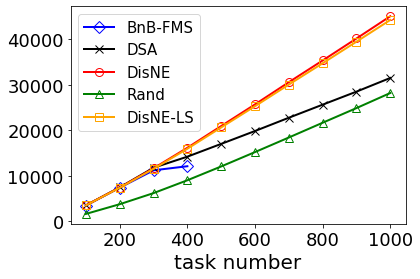

In [3]:
# plt.figure()
x = result_agg['task_num']
y1 = result_agg['BnBFMS_u']
plt.plot(x, y1, 'b-', linewidth=2, color='blue', marker='D', fillstyle='none', markersize=8)
y2 = result_agg['dsa_u']
plt.plot(x, y2, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)
y3 = result_agg['disNE_u']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)
y4 = result_agg['rand']
plt.plot(x, y4, 'b-', linewidth=2, color='green', marker='^', fillstyle='none', markersize=8)
y5 = result_agg['LS_u']
plt.plot(x, y5, 'b-', linewidth=2, color='orange', marker='s', fillstyle='none', markersize=8)
plt.legend(['BnB-FMS', 'DSA', 'DisNE', 'Rand', 'DisNE-LS'], fontsize=15)
# plt.ylabel('utility', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
# plt.savefig('utility1.pdf',bbox_inches='tight')
# plt.show()
##




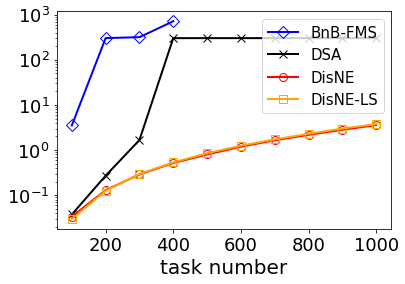

In [4]:
# plt.figure()
x = result_agg['task_num']
y1 = result_agg['BnBFMS_t']
plt.plot(x, y1, 'b-', linewidth=2, color ='blue', marker='D', fillstyle='none', markersize=8)
y2 = result_agg['dsa_t']
plt.plot(x, y2, 'b-', linewidth=2, color ='black', marker='x', fillstyle='none', markersize=8)
y3 = result_agg['disNE_t']
plt.plot(x, y3, 'b-', linewidth=2, color ='red', marker='o', fillstyle='none', markersize=8)
y4 = result_agg['LS_t']
plt.plot(x, y4, 'b-', linewidth=2,color ='orange', marker='s', fillstyle='none', markersize=8)
plt.legend(['BnB-FMS', 'DSA','DisNE', 'DisNE-LS'], fontsize=15)
ax = plt.gca()
ax.set_yscale('log')
plt.legend(['BnB-FMS', 'DSA', 'DisNE', 'DisNE-LS'], fontsize=15)
# plt.ylabel('time', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
plt.savefig('time1.pdf',bbox_inches='tight')
# plt.show()

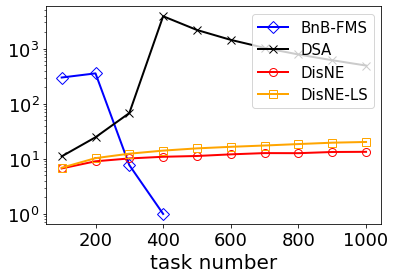

In [5]:
##
# plt.figure()
x = result_agg['task_num']
y1 = result_agg['BnBFMS_iter']
plt.plot(x, y1, 'b-', linewidth=2, color ='blue', marker='D', fillstyle='none', markersize=8)
y2 = result_agg['dsa_iter']
plt.plot(x, y2, 'b-', linewidth=2,color ='black', marker='x', fillstyle='none', markersize=8)
y3 = result_agg['disNE_iter']
plt.plot(x, y3, 'b-', linewidth=2,color ='red', marker='o', fillstyle='none', markersize=8)
y4 = result_agg['LS_iter']
plt.plot(x, y4, 'b-', linewidth=2,color ='orange', marker='s', fillstyle='none', markersize=8)
plt.legend(['BnB-FMS', 'DSA','DisNE', 'DisNE-LS'], fontsize=15)
ax = plt.gca()
ax.set_yscale('log')
# plt.ylabel('iteration', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
plt.savefig('round1.pdf',bbox_inches='tight')
# plt.show()

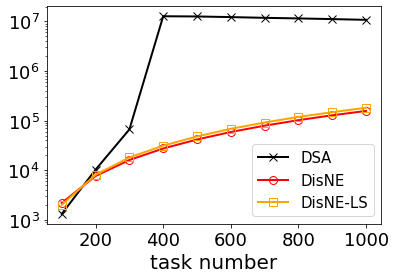

In [6]:
##
# plt.figure()
x = result_agg['task_num']
y1 = result_agg['dsa_msg']
plt.plot(x, y1, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)
y2 = result_agg['DisNE_msg']
plt.plot(x, y2, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)
y3 = result_agg['LS_msg_num']
plt.plot(x, y3, 'b-', linewidth=2,color ='orange', marker='s', fillstyle='none', markersize=8)
plt.legend(['DSA', 'DisNE', 'DisNE-LS'], fontsize=15)
ax = plt.gca()
ax.set_yscale('log')
# plt.ylabel('message passing', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=18)
plt.savefig('msg1.pdf',bbox_inches='tight')
# plt.show()
